# Covid-19 Analysis

#### The below analysis aims to achieve: 
*   Peak number of cases in Germany, France and Italy
*   Country with Highest Single Day case count surge

#### Required installs and imports

In [227]:
#!pip install pandas Jinja2 scipy

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Load Data

In [229]:
path = "./"
confirmed_case_data = pd.read_csv(path+"covid_19_confirmed_v1_lyst1747728690432.csv",header=0)

In [230]:
deaths_data = pd.read_csv(path+"covid_19_deaths_v1_lyst1747728711771.csv",header=1)

In [231]:
recovered_patients_data = pd.read_csv(path+"covid_19_recovered_v1_lyst1747728719904.csv",header=1)

In [232]:
deaths_data[deaths_data['Province/State'] == 'Diamond Princess'].iloc[:,4:].apply(pd.to_numeric, errors='coerce').sum(axis=1)

41    434.0
dtype: float64

In [233]:
confirmed_case_data[confirmed_case_data['Province/State'] == 'Diamond Princess'].iloc[:,4:].sum(axis=1)

41    32
dtype: int64

## Exploratory Analysis

##### Confirmed Case Data Information

##### Confirmed Cases (case_dataset): Dataset contains cumulative COVID-19 cases/day for each country and region spanning from January 22, 2022 to May 29, 2021 with 276 geographic entries.

In [234]:
# Row, column count of the dataset
print(f"Number of rows: {confirmed_case_data.shape[0]}, columns: {confirmed_case_data.shape[1]}")

Number of rows: 276, columns: 498


In [235]:
# # An overview of columns and datatypes of each column
# confirmed_case_data.info(verbose=True, show_counts=True)
confirmed_case_data.info(verbose=True, show_counts=True)

<class 'pandas.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 498 columns):
 #    Column          Non-Null Count  Dtype  
---   ------          --------------  -----  
 0    Province/State  86 non-null     object 
 1    Country/Region  276 non-null    object 
 2    Lat             274 non-null    float64
 3    Long            274 non-null    float64
 4    1/22/20         276 non-null    int64  
 5    1/23/20         276 non-null    int64  
 6    1/24/20         276 non-null    int64  
 7    1/25/20         276 non-null    int64  
 8    1/26/20         276 non-null    int64  
 9    1/27/20         276 non-null    int64  
 10   1/28/20         276 non-null    int64  
 11   1/29/20         276 non-null    int64  
 12   1/30/20         276 non-null    int64  
 13   1/31/20         276 non-null    int64  
 14   2/1/20          276 non-null    int64  
 15   2/2/20          276 non-null    int64  
 16   2/3/20          276 non-null    int64  
 17   2/4/20          276 non-n

In [236]:
# A quick view of the data to understand the values present in each column
confirmed_case_data.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,1255,1255,1257,1257,1258,1258,1258,1258,1259,1259
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,3447044,3482512,3514683,3539484,3562135,3586736,3622135,3663215,3702422,3732263
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,221559,221699,221880,221948,221982,222139,222269,222409,222513,222555
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,124,124,124,124,124,124,124,124,124,124
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,5567,5568,5570,5572,5574,5576,5576,5579,5580,5585


In [237]:
confirmed_case_data.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object

In [238]:
confirmed_case_data.size

137448

##### Deaths Dataset: This dataset records cumulative deaths count of COVID-19, structured similarly to the confirmed cases dataset providing crucial info of the lethality and outbreak severity in different areas.

In [239]:
# Row, column count of the dataset
print(f"Number of rows: {deaths_data.shape[0]}, columns: {deaths_data.shape[1]}")

Number of rows: 276, columns: 498


In [240]:
# An overview of columns and datatypes of each column
deaths_data.info(show_counts=True)

<class 'pandas.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(3), int64(493), object(2)
memory usage: 1.0+ MB


In [241]:
# A quick view of the data to understand the values present in each column
deaths_data.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,42,42,42,42,42,42,42,42,42,42
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,72699,73391,73688,74063,74480,75056,75588,76135,76693,77108
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,4364,4371,4386,4392,4394,4400,4411,4416,4423,4428
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,54,54,54,54,54,54,54,54,54,54


In [242]:
deaths_data[deaths_data['Province/State'].notna()].head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,54,54,54,54,54,54,54,54,54,54
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


##### Recovered Cases Dataset: Includes data on the cumulative number of individuals who have recovered from COVID-19, which is vital for understanding the disease's progression and the effectiveness of treatment protocols.

In [243]:
recovered_patients_data.info(verbose=True, show_counts=True)

<class 'pandas.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 498 columns):
 #    Column          Non-Null Count  Dtype  
---   ------          --------------  -----  
 0    Province/State  70 non-null     object 
 1    Country/Region  261 non-null    object 
 2    Lat             260 non-null    float64
 3    Long            260 non-null    float64
 4    1/22/20         261 non-null    int64  
 5    1/23/20         261 non-null    int64  
 6    1/24/20         261 non-null    int64  
 7    1/25/20         261 non-null    int64  
 8    1/26/20         261 non-null    int64  
 9    1/27/20         261 non-null    int64  
 10   1/28/20         261 non-null    int64  
 11   1/29/20         261 non-null    int64  
 12   1/30/20         261 non-null    int64  
 13   1/31/20         261 non-null    int64  
 14   2/1/20          261 non-null    int64  
 15   2/2/20          261 non-null    int64  
 16   2/3/20          261 non-null    int64  
 17   2/4/20          261 non-n

In [244]:
# Row, column count of the dataset
print(f"Number of rows: {recovered_patients_data.shape[0]}, columns: {recovered_patients_data.shape[1]}")

Number of rows: 261, columns: 498


In [245]:
# A quick view of the data to understand the values present in each column
recovered_patients_data.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,1188,1188,1192,1192,1200,1200,1200,1200,1206,1206
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,3035134,3060145,3083298,3106949,3133183,3157660,3181288,3219474,3252843,3288467
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,209980,210464,210835,211057,211375,211634,211957,212265,212566,212752
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,121,121,121,121,121,121,121,121,121,121
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
confirmed_cols_missing = confirmed_case_data.columns[confirmed_case_data.isna().any()]
deaths_cols_missing = deaths_data.columns[deaths_data.isna().any()]
recovered_cols_missing = recovered_patients_data.columns[recovered_patients_data.isna().any()]

In [247]:
missing_summary ={
    "Confirmed Columns Missing": confirmed_cols_missing.tolist(),
    "Deaths Columns Missing": deaths_cols_missing.tolist(),
    "Recovered Columns Missing": recovered_cols_missing.tolist(),
}
missing_summary

{'Confirmed Columns Missing': ['Province/State', 'Lat', 'Long'],
 'Deaths Columns Missing': ['Province/State', 'Lat', 'Long', '4/20/20'],
 'Recovered Columns Missing': ['Province/State', 'Lat', 'Long', '4/20/20']}

## EDA Observations
### Confirmed Cases Data: 
*   Many countries didn't have cases initially between January-March

### Deaths Data:
*   Majority of the date columns indicating deaths are of type int64 (integer)
*   Death counts started from first week of March supporting that many countries didn't have cases till March.
*   20/4/20 has na values 

### Recovery Data:
*   20/4/20 has na values 
### Common Observations
*   Province/State has NaN values for some countries indicating that 
the Province or State was not recorded for the counts

Q2.2: Generate plots of confirmed cases over time for the top countries.

In [248]:
confirmed_case_data.insert(4,'total_confirmed_cases',confirmed_case_data.iloc[:,4:].sum(axis=1))
top_countries_confirmed_cases =  confirmed_case_data.groupby('Country/Region')['total_confirmed_cases'].sum().sort_values(ascending=False).head(10)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_34680\1814747507.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  confirmed_case_data.insert(4,'total_confirmed_cases',confirmed_case_data.iloc[:,4:].sum(axis=1))


In [249]:
confirmed_country_grouped = confirmed_case_data.drop(columns=['Lat','Long']).groupby('Country/Region').sum()

In [250]:
top_countries_confirmed_cases.to_frame()

,total_confirmed_cases
Country/Region,
US,6047736004
India,3226953590
Brazil,2653620509
Russia,930548859
France,855026731
United Kingdom,783158203
Spain,648994792
Italy,636696956
Turkey,618940956


In [251]:
confirmed_country_grouped = confirmed_case_data.drop(columns=['Lat', 'Long']).groupby('Country/Region').sum()

# Calculate total confirmed cases to identify top 10 countries
confirmed_country_grouped['total_confirmed_cases'] = confirmed_country_grouped.iloc[:, 1:].sum(axis=1)

# Get top 10 countries by total confirmed cases
top_10_countries = confirmed_country_grouped['total_confirmed_cases'].sort_values(ascending=False).head(10).index.tolist()

# Filter data for top 10 countries
top_countries_data = confirmed_country_grouped.loc[top_10_countries].drop(columns=['total_confirmed_cases']).T[1:]

# Convert the index to datetime
top_countries_data.index = pd.to_datetime(top_countries_data.index)



C:\Users\Harsh\AppData\Local\Temp\ipykernel_34680\2274169158.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  top_countries_data.index = pd.to_datetime(top_countries_data.index)


In [252]:
top_countries_data[40:]

Country/Region,US,India,Brazil,Russia,France,United Kingdom,Spain,Italy,Turkey,Germany
2020-03-02,55,5,2,3,191,134,120,2036,0,159
2020-03-03,74,5,2,3,212,189,165,2502,0,196
2020-03-04,107,28,4,3,288,246,222,3089,0,262
2020-03-05,184,30,4,4,426,295,259,3858,0,482
2020-03-06,237,31,13,13,616,374,400,4636,0,670
...,...,...,...,...,...,...,...,...,...,...
2021-05-25,33166418,27157795,16194209,4960174,5670486,4483177,3652879,4197892,5203385,3662568
2021-05-26,33190470,27369093,16274695,4968421,5683143,4486168,3657886,4201827,5212123,3667041
2021-05-27,33217995,27555457,16342162,4977332,5697076,4489552,3663176,4205970,5220549,3673990
2021-05-28,33239963,27729247,16391930,4986458,5708350,4493582,3668658,4209707,5228322,3680159


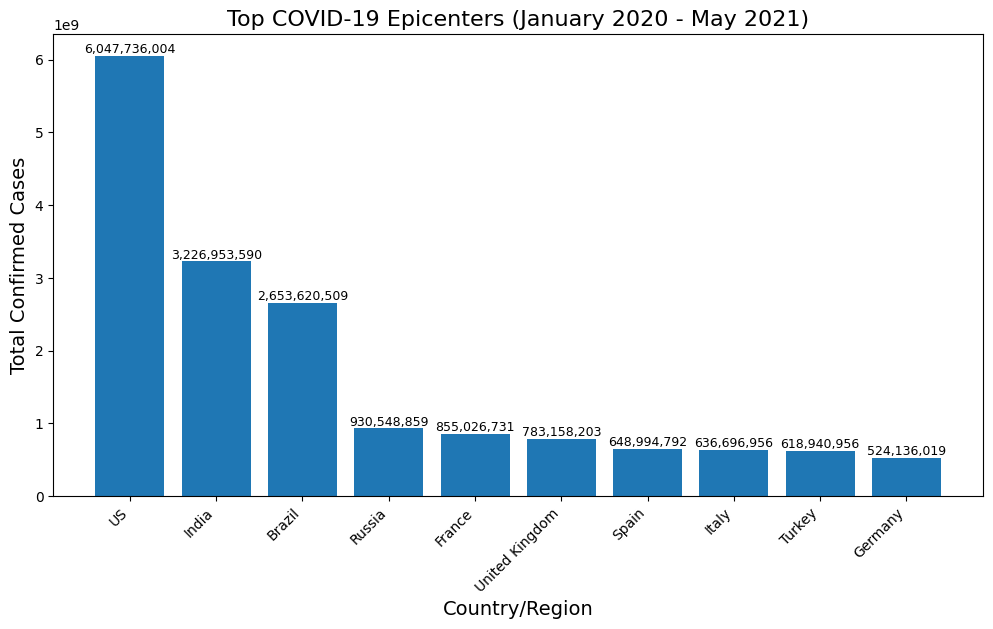

In [253]:
plt.figure(figsize=(12, 6))

# Plot bar chart
plt.bar(top_countries_confirmed_cases.index.astype(str), top_countries_confirmed_cases.values)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Country/Region', fontsize=14)
plt.ylabel('Total Confirmed Cases', fontsize=14)
plt.title('Top COVID-19 Epicenters (January 2020 - May 2021)', fontsize=16)

for idx, val in enumerate(top_countries_confirmed_cases.values):
    plt.text(idx, val, f'{val:,}', ha='center', va='bottom', fontsize=9)
plt.show()

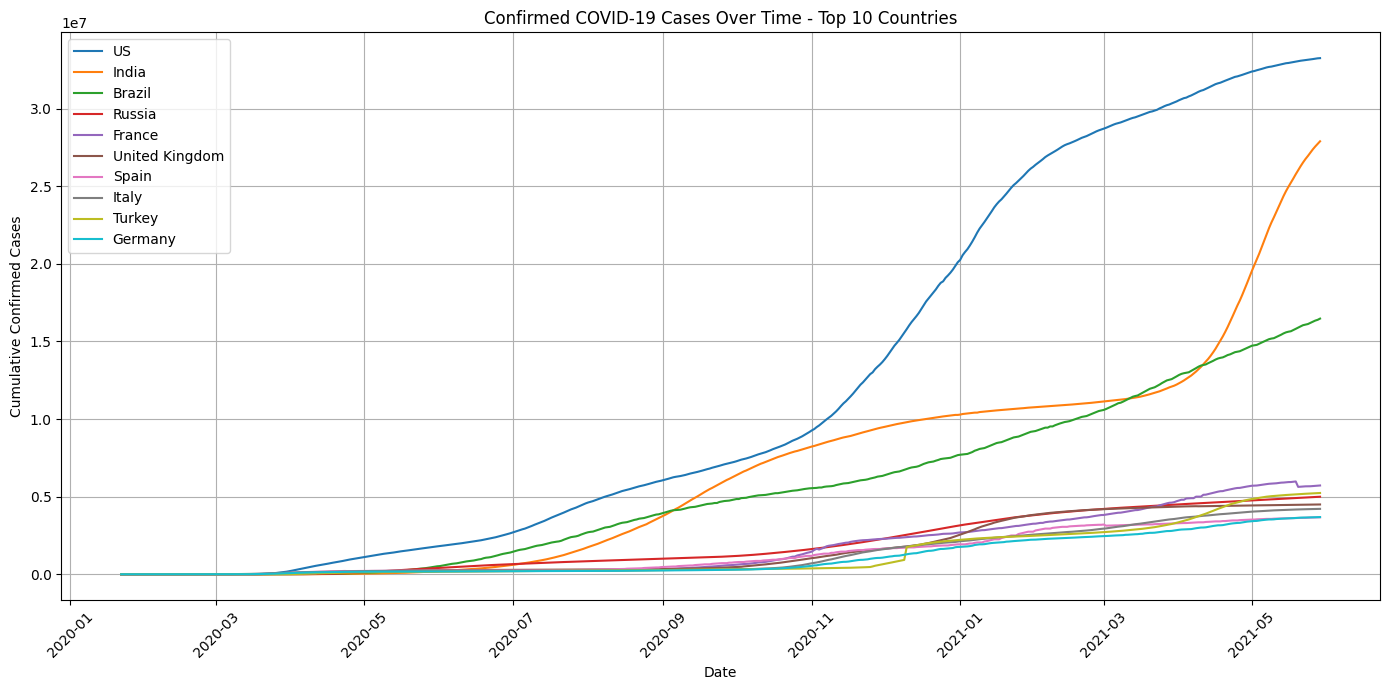

In [254]:
plt.figure(figsize=(14, 7))
for country in top_countries_data.columns:
    plt.plot(top_countries_data.index, top_countries_data[country], label=country)

plt.xlabel('Date')
plt.ylabel('Cumulative Confirmed Cases')
plt.title('Confirmed COVID-19 Cases Over Time - Top 10 Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

Q2.3: Generate plots of confirmed cases over time for China.

Approach: 
*    Filter dataframe by Country/Region column for China then use iloc slicing to get only date columns
*    Perform sum of case counts of State/Provinces based on date to further reduce down data
*    Use month-year period (convert to datetime first) to group data and perform sum aggregation to further get monthly counts from 2020-21
*    Plot the data with column1 (month) on x-axis and column2(confirmed_cases) on y-axis

In [ ]:
confirmed_cases_china = confirmed_case_data[confirmed_case_data['Country/Region']=='China'].iloc[:,4:]

date_case_counts = confirmed_cases_china.sum().reset_index(name='confirmed_cases').iloc[1:,:]
date_case_counts.columns = ['date','confirmed_cases']

# Convert to date to use month and year as a grouping key
date_case_counts['date'] = pd.to_datetime(date_case_counts['date'],format='%m/%d/%y')

# Group by month and year and sum on the case counts to get monthly confimed case counts
monthly_confirmed_cases = date_case_counts.groupby(by=date_case_counts['date'].dt.to_period('M').astype(str))['confirmed_cases'].sum().reset_index()
monthly_confirmed_cases.rename(columns={'date':'Month'},inplace=True)
monthly_confirmed_cases['Month'] = pd.to_datetime(monthly_confirmed_cases['Month'])

In [256]:
monthly_confirmed_cases.head()

,Month,confirmed_cases
0,2020-01-01,38008
1,2020-02-01,1633361
2,2020-03-01,2515426
3,2020-04-01,2500143
4,2020-05-01,2605281


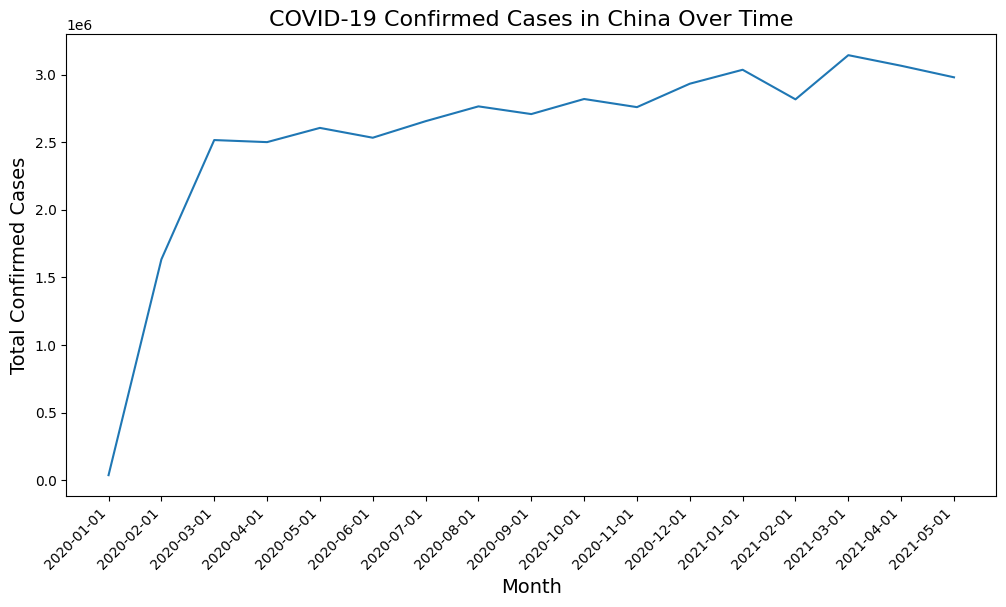

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(monthly_confirmed_cases['Month'].astype(str), monthly_confirmed_cases['confirmed_cases'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Confirmed Cases', fontsize=14)
plt.title('COVID-19 Confirmed Cases in China Over Time', fontsize=16)
plt.show()

### Handle Missing Data for Time-Series Columns
##### Analysis from previous observation: 
###### 'Confirmed Columns Missing': ['Province/State', 'Lat', 'Long']
###### 'Deaths Columns Missing': ['Province/State', 'Lat', 'Long', '4/20/20']
###### 'Recovered Columns Missing': ['Province/State', 'Lat', 'Long', '4/20/20']

 Considering the column for '4/20/20' has NaN values in deaths_data and recovered_patients_data, it can be updated but needs to be updated in such a way to minimise false positive or negatives

Question 3: Handling Missing Data


Q3.1: Identify these missing values and replace them using a suitable imputation method, such as forward filling, for time-series data.

In [258]:
deaths_data['4/20/20']

0      36.0
1      26.0
2       NaN
3      37.0
4       2.0
       ... 
271     0.0
272     2.0
273     0.0
274     3.0
275     3.0
Name: 4/20/20, Length: 276, dtype: float64

In [259]:
deaths_data['4/20/20'] = deaths_data['4/20/20'].ffill().bfill()
recovered_patients_data['4/20/20'] = recovered_patients_data['4/20/20'].ffill().bfill()
deaths_data[deaths_data['4/20/20'].isna()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21


In [260]:
# deaths_data['4/20/20'].interpolate(method='linear',inplace=True)
# deaths_data['4/20/20'].astype("int64")
# recovered_patients_data['4/20/20'].interpolate(method='linear',inplace=True)
# recovered_patients_data['4/20/20'].astype("int64")


### Data Cleaning and Preparation
##### Question 4: Data Cleaning and Preparation
##### Q4.1: Replace blank values in the province column with "All Provinces."

In [261]:
confirmed_case_data['Province/State'] = confirmed_case_data['Province/State'].fillna('All Provinces')
deaths_data['Province/State']=deaths_data['Province/State'].fillna('All Provinces')
recovered_patients_data['Province/State'] = recovered_patients_data['Province/State'].fillna('All Provinces')

In [262]:
confirmed_case_data.head()

,Province/State,Country/Region,Lat,Long,total_confirmed_cases,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,All Provinces,Afghanistan,33.93911,67.709953,17026442,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,All Provinces,Albania,41.15330,20.168300,19768869,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,All Provinces,Algeria,28.03390,1.659600,27684358,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,All Provinces,Andorra,42.50630,1.521800,2379802,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,All Provinces,Angola,-11.20270,17.873900,4764863,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


### Independent Analysis

Q5.1: Analyze peak number of daily new cases in Germany France and Italy. Which country experienced the highest single-day surge and when did it occur

In [311]:
countries_interested = ['Germany','France','Italy']
filtered_confirmed_cases = confirmed_case_data.drop(columns=['Lat', 'Long'])
# using numeric only to include only numeric values
country_daily_cases_total = filtered_confirmed_cases.drop(columns=['total_confirmed_cases']).groupby('Country/Region').sum(numeric_only=True)
country_daily_cases_total = country_daily_cases_total.T

country_daily_cases_total.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0


In [264]:
country_daily_cases_total.reset_index(inplace=True)
country_daily_cases_total.index.name = None
country_daily_cases_total.columns.name = None
country_daily_cases_total = country_daily_cases_total.iloc[1:]
country_daily_cases_total.rename(columns={'index':'Date'},inplace=True)

# Set index
country_daily_cases_total['Date'] = pd.to_datetime(country_daily_cases_total['Date'])
country_daily_cases_total.set_index('Date', inplace=True)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_34680\3368519503.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  country_daily_cases_total['Date'] = pd.to_datetime(country_daily_cases_total['Date'])


In [265]:
country_daily_cases_total.idxmax()

Afghanistan          2021-05-29
Albania              2021-05-29
Algeria              2021-05-29
Andorra              2021-05-28
Angola               2021-05-29
                        ...    
Vietnam              2021-05-29
West Bank and Gaza   2021-05-29
Yemen                2021-05-29
Zambia               2021-05-29
Zimbabwe             2021-05-29
Length: 193, dtype: datetime64[s]

In [266]:
# This returns the index for the maximum value in each column.
country_daily_cases_total.idxmax()


Afghanistan          2021-05-29
Albania              2021-05-29
Algeria              2021-05-29
Andorra              2021-05-28
Angola               2021-05-29
                        ...    
Vietnam              2021-05-29
West Bank and Gaza   2021-05-29
Yemen                2021-05-29
Zambia               2021-05-29
Zimbabwe             2021-05-29
Length: 193, dtype: datetime64[s]

In [267]:
peak_dates = country_daily_cases_total.idxmax()
peak_values = country_daily_cases_total.max()

# Combine into a summary DataFrame
peak_summary = pd.DataFrame({
    'Peak Case Count Date': peak_dates,
    'Peak New Cases': peak_values
})
peak_summary[peak_summary.index.isin(['Germany','France','Italy'])]

,Peak Case Count Date,Peak New Cases
France,2021-05-19,5978650
Germany,2021-05-29,3684672
Italy,2021-05-29,4213055


In [268]:
# This returns the maximum(peak) case counts from the dataframe
required_country_peak_counts = country_daily_cases_total[['France','Germany','Italy']].max()

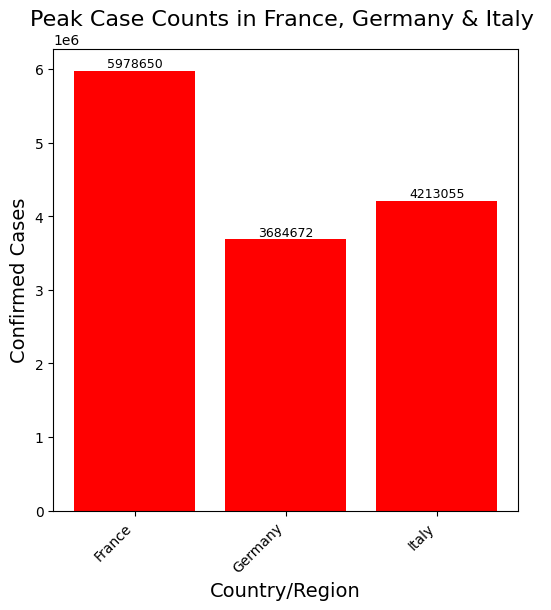

In [269]:
plt.figure(figsize=(6, 6))

# Plot bar chart
plt.bar(required_country_peak_counts.index, required_country_peak_counts.values,color='red')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Country/Region', fontsize=14)
plt.ylabel('Confirmed Cases', fontsize=14)
plt.title('Peak Case Counts in France, Germany & Italy ', fontsize=16)

for idx, val in enumerate(required_country_peak_counts.values):
    plt.text(idx, val, f'{val}', ha='center', va='bottom', fontsize=9)
plt.show()

In [270]:
highest_country = peak_summary['Peak New Cases'].idxmax()
highest_date = peak_summary.loc[highest_country, 'Peak Case Count Date']
highest_value = peak_summary.loc[highest_country, 'Peak New Cases']

In [271]:
highest_case_marked_country = pd.DataFrame({'Country':highest_country,'Peake Case Count Date':pd.Series(highest_date),'Case Count on Surge Date':pd.Series(highest_value)})
highest_case_marked_country

,Country,Peake Case Count Date,Case Count on Surge Date
0,US,2021-05-29,33251939


Q5.2: Compare the recovery rates (recoveries/confirmed cases) between Canada and Australia as of December 31, 2020. Which country showed better management of the pandemic according to this metric?


In [272]:
recovered_countries_list = ['Canada','Australia']
target_check_date = '12/31/20'
recovered_patients_filtered = recovered_patients_data.drop(columns=['Lat', 'Long'])[recovered_patients_data['Country/Region'].isin(recovered_countries_list)]
confirmed_country_filtered = filtered_confirmed_cases[filtered_confirmed_cases['Country/Region'].isin(recovered_countries_list)]
confirmed_country_grouped = confirmed_country_filtered.groupby('Country/Region').sum(numeric_only=True)
recovered_patients_grouped = recovered_patients_filtered.groupby('Country/Region').sum(numeric_only=True)
confirmed_cumulative_cases = confirmed_country_grouped[target_check_date]
confirmed_cumulative_recoveries = recovered_patients_grouped[target_check_date]
recovery_rate = (confirmed_cumulative_recoveries/confirmed_cumulative_cases).round(3) * 100


In [273]:
recovery_summary = pd.DataFrame({
    'Confirmed Case Counts': confirmed_cumulative_cases,
    'Recoveries': confirmed_cumulative_recoveries,
    'Recovery Rate (%)': recovery_rate
})
recovery_summary

,Confirmed Case Counts,Recoveries,Recovery Rate (%)
Country/Region,,,
Australia,28425,22565,79.4
Canada,584409,493638,84.5


In [274]:
recovery_summary.columns

Index(['Confirmed Case Counts', 'Recoveries', 'Recovery Rate (%)'], dtype='object')

In [275]:
plt.clf()

<Figure size 640x480 with 0 Axes>

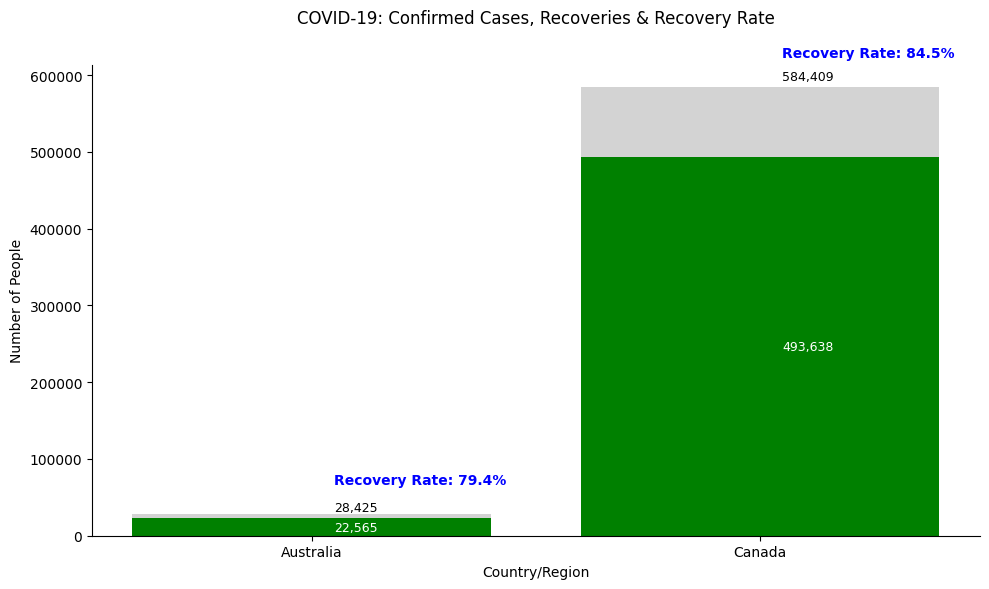

In [276]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(recovery_summary.index, recovery_summary['Confirmed Case Counts'], color='lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Overlay smaller bars for recoveries
ax.bar(recovery_summary.index, recovery_summary['Recoveries'], color='green')

# Annotate Recoveries and Confirmed Case Counts
for idx, country in enumerate(recovery_summary.index):
    confirmed = recovery_summary.loc[country, 'Confirmed Case Counts']
    recovered = recovery_summary.loc[country, 'Recoveries']
    rate = recovery_summary.loc[country, 'Recovery Rate (%)']

    # Recovery value inside green bar
    ax.text(idx + 0.05, recovered / 2, f"{recovered:,}", va='center', ha='left', fontsize=9, color='white')

    # Confirmed count at top
    ax.text(idx + 0.05, confirmed + confirmed * 0.01, f"{confirmed:,}", va='bottom', ha='left', fontsize=9, color='black')

   # Recovery rate label
    ax.text(
        idx + 0.05,
        confirmed + 35000,  # increase further to avoid collision
        f"Recovery Rate: {rate}%",
        va='bottom',
        ha='left',
        fontsize=10,
        fontweight='bold',
        color='blue'
    )
    
plt.subplots_adjust(top=0.85)

# Titles and labels
ax.set_title('COVID-19: Confirmed Cases, Recoveries & Recovery Rate', pad=30)
ax.set_ylabel('Number of People')
ax.set_xlabel('Country/Region')
plt.xticks(rotation=0)
# plt.grid(axis='y')
plt.tight_layout()

plt.show()

Q5.3: What is the distribution of death rates (deaths/confirmed cases) among provinces in Canada? Identify the province with the highest and lowest death rate as of the latest data point.

In [277]:
deaths_data_filtered = deaths_data.drop(columns=['Lat', 'Long'])
#Repurposed country filtered dataset from previous question
confirmed_cases_canada = confirmed_country_filtered[confirmed_country_filtered["Country/Region"]=='Canada']
deaths_canada = deaths_data_filtered[deaths_data_filtered['Country/Region']=='Canada']


confirmed_cases_canada_grouped = confirmed_cases_canada.groupby('Province/State').sum(numeric_only=True)
confirmed_deaths_canada_grouped = deaths_canada.groupby('Province/State').sum(numeric_only=True)
# confirmed_cases_canada_grouped.head()
# # Getting the latest date using indexing
last_case_date = confirmed_cases_canada_grouped.columns[-1]
total_death_rate = (confirmed_deaths_canada_grouped[last_case_date]/confirmed_cases_canada_grouped[last_case_date]).round(3) * 100

# # This is optional, I did it because Diamond Princes had 0 confirmed cases and 1 confirmed death
# total_death_rate.replace([np.inf, -np.inf], np.nan, inplace=True)
# total_death_rate.fillna(0, inplace=True)
print(last_case_date)
confirmed_cases_canada_grouped[last_case_date]
# confirmed_deaths_canada_grouped[last_case_date]
total_death_rate.replace([np.inf, -np.inf], np.nan, inplace=True)
total_death_rate.fillna(0, inplace=True)
total_death_rate = total_death_rate.round(1)

canada_covid_deaths_summary = pd.DataFrame({
    'Confirmed Cases': confirmed_cases_canada_grouped[last_case_date],
    'Confirmed Deaths': confirmed_deaths_canada_grouped[last_case_date],
    'Death Rate (%)': total_death_rate
})




5/29/21


In [278]:
def highlight_row(s):
    return ['background-color: orange; color:black;' if s.name in exclude_regions else '' for column in s]

canada_covid_deaths_summary.style.apply(highlight_row, axis=1)


,Confirmed Cases,Confirmed Deaths,Death Rate (%)
Province/State,,,
Alberta,226855,2214,1.000000
British Columbia,143581,1692,1.200000
Diamond Princess,0,1,0.000000
Grand Princess,13,0,0.000000
Manitoba,50499,1045,2.100000
New Brunswick,2191,43,2.000000
Newfoundland and Labrador,1302,6,0.500000
Northwest Territories,127,0,0.000000
Nova Scotia,5530,84,1.500000


In [279]:
exclude_regions = ['Diamond Princess', 'Grand Princess', 'Repatriated Travellers']
canada_covid_deaths_summary = canada_covid_deaths_summary.drop(index=exclude_regions, errors='ignore')

min_death_rate = canada_covid_deaths_summary['Death Rate (%)'].min()
lowest_death_rate_provinces = canada_covid_deaths_summary[
    canada_covid_deaths_summary['Death Rate (%)'] == min_death_rate
]

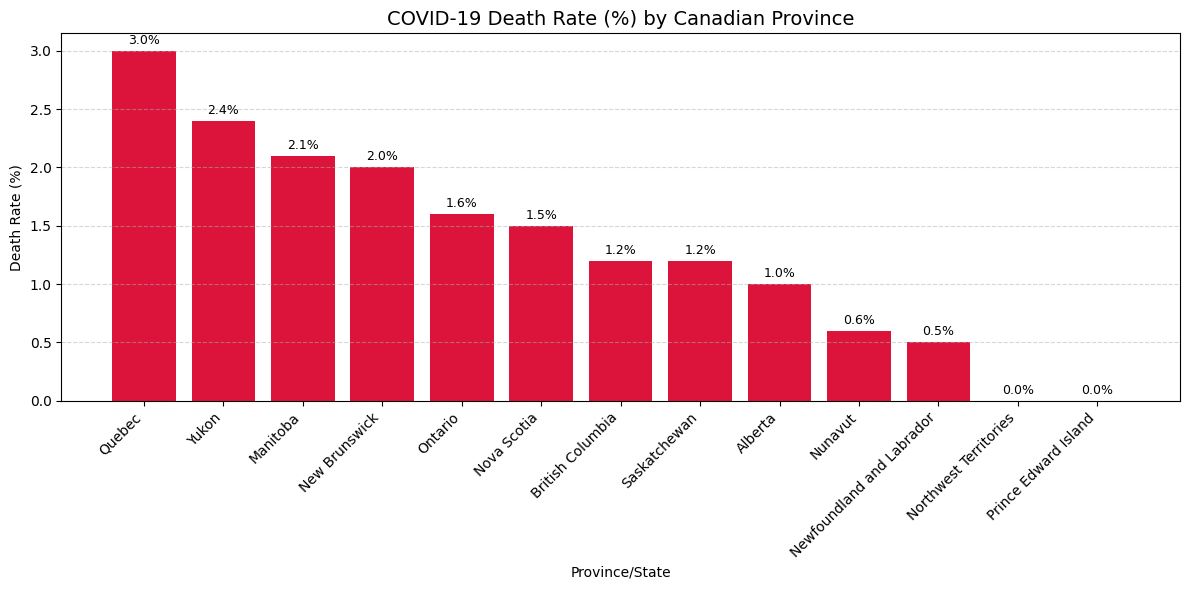

In [280]:
fig, ax = plt.subplots(figsize=(12, 6))
canada_covid_deaths_summary_sorted = canada_covid_deaths_summary.sort_values(by='Death Rate (%)', ascending=False)

bars = ax.bar(
    canada_covid_deaths_summary_sorted.index,
    canada_covid_deaths_summary_sorted['Death Rate (%)'],
    color='crimson'
)
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.1f}%",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

ax.set_title('COVID-19 Death Rate (%) by Canadian Province', fontsize=14)
ax.set_ylabel('Death Rate (%)')
ax.set_xlabel('Province/State')



plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [281]:
highest_deaths_province = canada_covid_deaths_summary["Death Rate (%)"].idxmax()
highest_death_rate = canada_covid_deaths_summary.loc[highest_deaths_province,'Death Rate (%)']
lowest_deaths_province = canada_covid_deaths_summary["Death Rate (%)"].idxmin()
lowest_death_rate = canada_covid_deaths_summary.loc[lowest_deaths_province,'Death Rate (%)']

print("State/Province with highest death rate: "+ highest_deaths_province +", Death Rate: "+highest_death_rate.astype(str))
print("State/Province with highest death rate: "+ lowest_deaths_province +", Death Rate: "+lowest_death_rate.astype(str))

State/Province with highest death rate: Quebec, Death Rate: 3.0
State/Province with highest death rate: Northwest Territories, Death Rate: 0.0


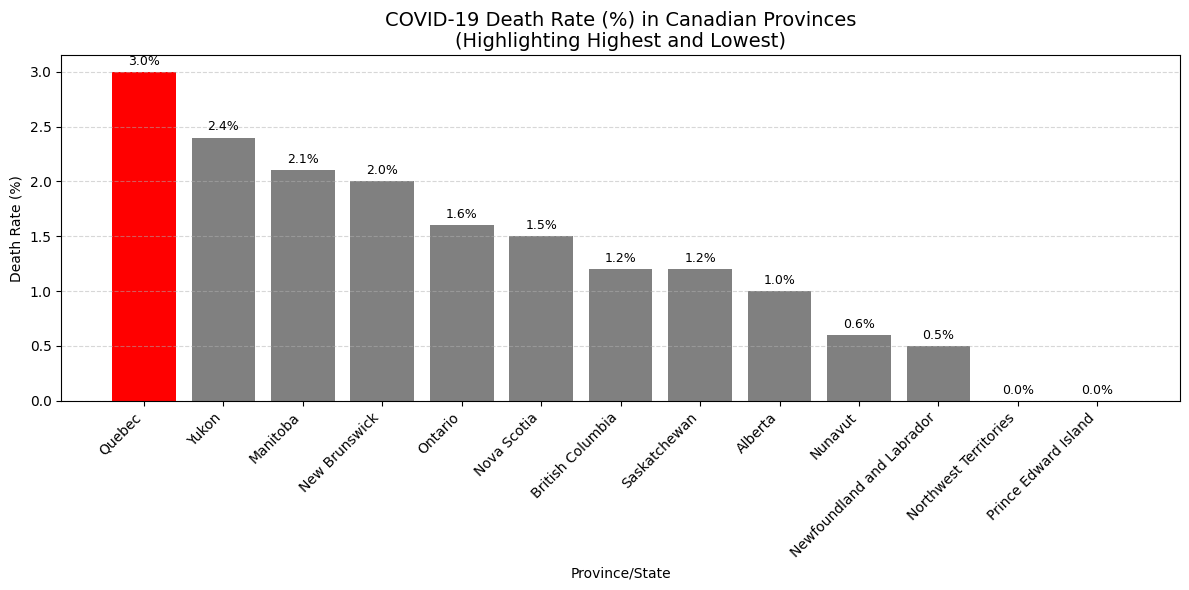

In [282]:
canada_covid_deaths_summary_sorted = canada_covid_deaths_summary.sort_values(
    by='Death Rate (%)',
    ascending=False
)
highlight_colors = ['red' if province == 'Quebec' else 'gray'
                    for province in canada_covid_deaths_summary_sorted.index]

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(
    canada_covid_deaths_summary_sorted.index,
    canada_covid_deaths_summary_sorted['Death Rate (%)'],
    color=highlight_colors
)


for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.1f}%",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)
ax.set_title('COVID-19 Death Rate (%) in Canadian Provinces\n(Highlighting Highest and Lowest)', fontsize=14)
ax.set_ylabel('Death Rate (%)')
ax.set_xlabel('Province/State')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Question 6: Data Transformation

Q6.1: Transform the 'deaths' dataset from wide format (where each column represents a date) to long format, where each row represents a single date, ensuring that the date column is in datetime format. How would this
transformation be executed?

In [283]:
deaths_data.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,266,267,268,269,270,271,272,273,274,275
Province/State,All Provinces,All Provinces,All Provinces,All Provinces,All Provinces,All Provinces,All Provinces,All Provinces,Australian Capital Territory,New South Wales,...,All Provinces,All Provinces,All Provinces,All Provinces,All Provinces,All Provinces,All Provinces,All Provinces,All Provinces,All Provinces
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Lat,33.93911,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,55.3781,-32.5228,41.377491,-15.3767,6.4238,14.058324,31.9522,15.552727,-13.133897,-19.015438
Long,67.709953,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.0124,151.2093,...,-3.436,-55.7658,64.585262,166.9592,-66.5897,108.277199,35.2332,48.516388,27.849332,29.154857
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Tried to use transpose here but that only flips rows and columns and doesn't change the shape

In [284]:
deaths_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,All Provinces,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,All Provinces,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,All Provinces,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,All Provinces,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,All Provinces,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


In [285]:
# Discovered melt function which is used to keep identifier columns and unpivot all the measured variables
# id_vars are the columns that should be kept as is
# var_name is the new column name which needs to be converted from wide to long form (all date columns here)
# value_name column name for the values of those date columns for each province which will also be represented in long format
deaths_data_long = deaths_data.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],  # columns to keep
    var_name='Date',             # name of the new date column
    value_name='Deaths'          # name of the new value column
)

deaths_data_long['Date'] = pd.to_datetime(deaths_data_long['Date'])

C:\Users\Harsh\AppData\Local\Temp\ipykernel_34680\483393008.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_data_long['Date'] = pd.to_datetime(deaths_data_long['Date'])


In [286]:
deaths_data_long.head()

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,All Provinces,Afghanistan,33.93911,67.709953,2020-01-22,0.0
1,All Provinces,Albania,41.15330,20.168300,2020-01-22,0.0
2,All Provinces,Algeria,28.03390,1.659600,2020-01-22,0.0
3,All Provinces,Andorra,42.50630,1.521800,2020-01-22,0.0
4,All Provinces,Angola,-11.20270,17.873900,2020-01-22,0.0


Q6.2: What is the total number of deaths reported per country up to the current date?

In [287]:
current_date = deaths_data.columns[-1]
deaths_by_country = deaths_data.groupby('Country/Region').sum(numeric_only=True)
total_deaths_by_country = deaths_by_country[current_date].sort_values(ascending=False)

In [288]:
total_deaths_by_country.head().to_frame('Deaths')

,Deaths
Country/Region,
US,594306
Brazil,461057
India,325972
Mexico,223455
United Kingdom,128037


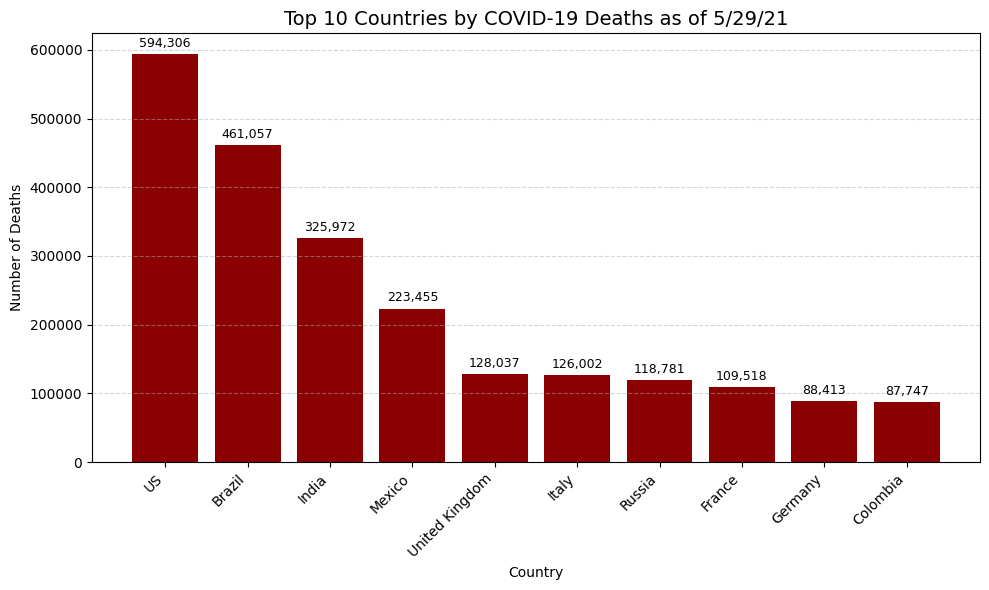

In [289]:
top_10_countries_by_deaths = total_deaths_by_country.head(10)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_10_countries_by_deaths.index, top_10_countries_by_deaths.values, color='darkred')
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{int(height):,}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)
ax.set_title(f"Top 10 Countries by COVID-19 Deaths as of {current_date}", fontsize=14)
ax.set_ylabel("Number of Deaths")
ax.set_xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Q6.3: What are the top 5 countries with the highest average daily deaths?

In [290]:
print(deaths_data.shape)
print(deaths_data.shape[1]-5) # checking number of days by subtracting column indices


(276, 498)
493


In [291]:
# if condition is because error due to already present column if run multiple times
if 'total_confirmed_deaths' not in deaths_data.columns:
    deaths_data.insert(4,'total_confirmed_deaths',deaths_data.iloc[:,4:].sum(axis=1), )
country_deaths = deaths_data.groupby('Country/Region')['total_confirmed_deaths'].sum()
days = deaths_data.shape[1]-5
avg_deaths_daily = (country_deaths/days).sort_values(ascending=False).head(5).to_frame('Average Daily Deaths')
avg_deaths_daily['Average Daily Deaths'] = avg_deaths_daily['Average Daily Deaths'].round(0).astype("int64")

C:\Users\Harsh\AppData\Local\Temp\ipykernel_34680\2595404895.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  deaths_data.insert(4,'total_confirmed_deaths',deaths_data.iloc[:,4:].sum(axis=1), )


<Axes: xlabel='Country/Region'>

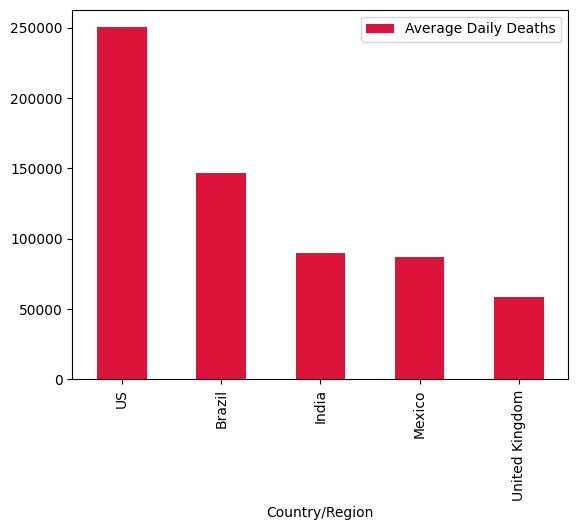

In [292]:
avg_deaths_daily.plot(kind='bar', color='crimson')

Q6.4: How have the total deaths evolved over time in the United States?

In [293]:
# us_deaths_monthly = 
# The below does diff with previous row sum for the previous date 
us_deaths_monthly = deaths_data_long[deaths_data_long['Country/Region']=='US']\
    .groupby('Date')['Deaths']\
    .sum()\
    .diff()\
    .resample('ME')\
    .sum()\
    .to_frame(name='Total Deaths')
us_deaths_monthly.set_index(pd.Series(us_deaths_monthly.index).dt.to_period('M').astype(str))

,Total Deaths
Date,
2020-01,0.0
2020-02,1.0
2020-03,5369.0
2020-04,60865.0
2020-05,41605.0
2020-06,19767.0
2020-07,26550.0
2020-08,29661.0
2020-09,23399.0


In [294]:
y = us_deaths_monthly['Total Deaths']
y.iloc[-2]

23736.0

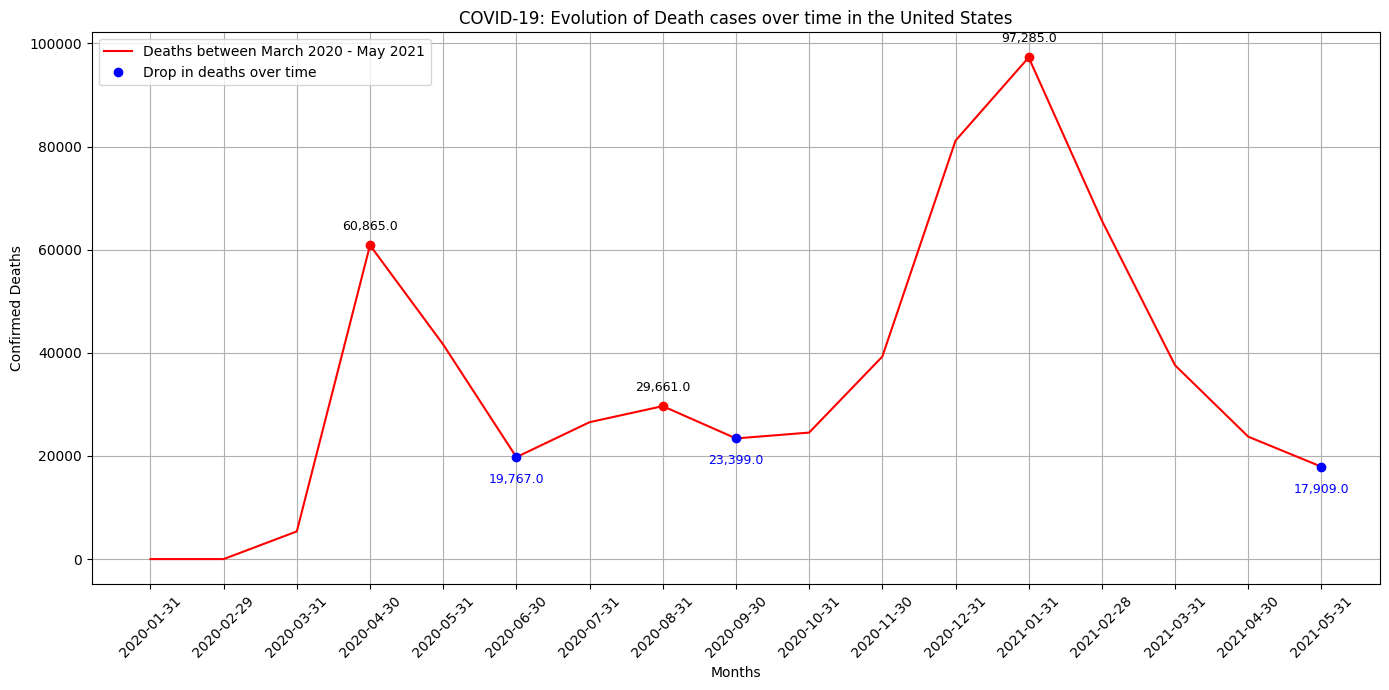

In [295]:
x = pd.Series(us_deaths_monthly.index).astype(str)
y = us_deaths_monthly['Total Deaths']

# Detect peaks (local maxima)
checked_drops = []
if y.iloc[-1] < y.iloc[-2]:
    checked_drops.append(len(y) - 1)
peaks, _ = find_peaks(y)
dips, _ = find_peaks(-y)
dips = list(dips)+ checked_drops

# Plot
plt.figure(figsize=(14, 7))
plt.plot(x, y, label="Deaths between March 2020 - May 2021", color="red")

# Mark peaks
plt.plot(x[peaks], y.iloc[peaks], "ro")  # red dots at peaks
for i in peaks:
    plt.text(x[i], y.iloc[i] + 3000, f'{y.iloc[i]:,}', ha='center', fontsize=9, color='black')
    
# Highlight Dips
plt.plot(x[dips], y.iloc[dips], "bo", label="Drop in deaths over time")  # blue dots
for i in dips:
    plt.text(x[i], y.iloc[i] - 5000, f'{y.iloc[i]:,}', ha='center', fontsize=9, color='blue')

plt.xlabel('Months')
plt.ylabel('Confirmed Deaths')
plt.title('COVID-19: Evolution of Death cases over time in the United States')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Q7.1: How would you merge the transformed datasets of confirmed cases, deaths, and recoveries on the 'Country/Region' and 'Date' columns to create a comprehensive view of the pandemic's impact?


In [296]:
confirmed_data_long = confirmed_case_data.melt(id_vars=['Province/State','total_confirmed_cases', 'Country/Region', 'Lat', 'Long'],  # columns to keep
    var_name='Date',             
    value_name='Confirmed_Cases'        
)

confirmed_data_long['Date'] = pd.to_datetime(confirmed_data_long['Date'])

recoveries_data_long = recovered_patients_data.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],  # columns to keep
    var_name='Date',             
    value_name='Recoveries'          
)

recoveries_data_long['Date'] = pd.to_datetime(recoveries_data_long['Date'])

C:\Users\Harsh\AppData\Local\Temp\ipykernel_34680\1872759827.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_data_long['Date'] = pd.to_datetime(confirmed_data_long['Date'])
C:\Users\Harsh\AppData\Local\Temp\ipykernel_34680\1872759827.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  recoveries_data_long['Date'] = pd.to_datetime(recoveries_data_long['Date'])


In [297]:
merged_data = confirmed_data_long.merge(deaths_data_long,on=['Province/State', 'Country/Region', 'Lat', 'Long','Date'])
merged_data = merged_data.merge(recoveries_data_long,on=['Province/State', 'Country/Region', 'Lat', 'Long','Date'])


In [298]:
merged_data.loc[10:]

,Province/State,total_confirmed_cases,Country/Region,Lat,Long,Date,Confirmed_Cases,Deaths,Recoveries
10,Northern Territory,27907,Australia,-12.463400,130.845600,2020-01-22,0,0.0,0.0
11,Queensland,523521,Australia,-27.469800,153.025100,2020-01-22,0,0.0,0.0
12,South Australia,229862,Australia,-34.928500,138.600700,2020-01-22,0,0.0,0.0
13,Tasmania,96320,Australia,-42.882100,147.327200,2020-01-22,0,0.0,0.0
14,Victoria,6347903,Australia,-37.813600,144.963100,2020-01-22,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
125965,All Provinces,615984,Vietnam,14.058324,108.277199,2021-05-29,6908,47.0,2896.0
125966,All Provinces,41818939,West Bank and Gaza,31.952200,35.233200,2021-05-29,307838,3492.0,300524.0
125967,All Provinces,962066,Yemen,15.552727,48.516388,2021-05-29,6731,1319.0,3399.0
125968,All Provinces,13493953,Zambia,-13.133897,27.849332,2021-05-29,94751,1276.0,91594.0


Q7.2: Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of the pandemic.[From the merged dataset]


In [299]:
country_data_grouped = merged_data.groupby(['Country/Region','Date'])[['Confirmed_Cases','Deaths','Recoveries']].sum()
# There are multi indices below so we can use level attribute in groupby which allows to select first index

In [300]:
country_data_grouped_monthly = country_data_grouped.groupby(level=0).resample('ME',level=1).sum().reset_index()

In [301]:
country_data_grouped_monthly['Date'] = country_data_grouped_monthly['Date']
country_data_grouped_monthly = country_data_grouped_monthly.groupby(['Country/Region','Date'])[['Confirmed_Cases', 'Deaths', 'Recoveries']].sum().reset_index()

In [302]:
top_countries = country_data_grouped_monthly['Country/Region'].value_counts().nlargest(3).index.tolist()
subset = country_data_grouped_monthly[country_data_grouped_monthly['Country/Region'].isin(top_countries)]

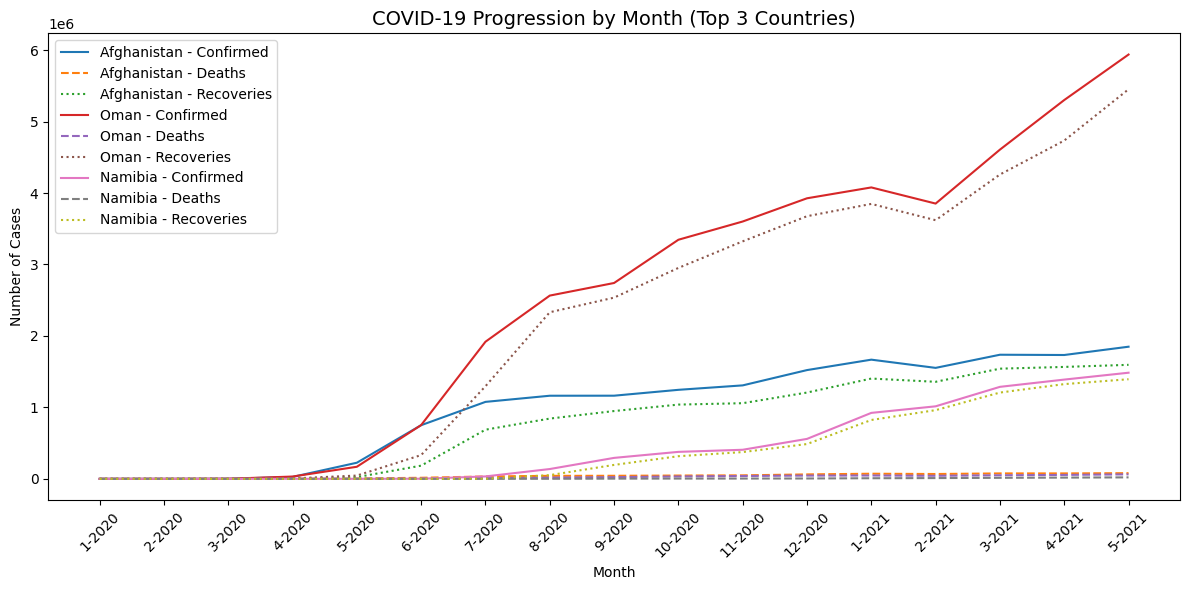

In [303]:
fig, ax = plt.subplots(figsize=(12, 6))

for country in top_countries:
    country_data = subset[subset['Country/Region'] == country]
    ct_date = pd.Series(country_data['Date'].dt.month.astype(str))+"-"+pd.Series(country_data['Date'].dt.year.astype(str))
    country_data = subset[subset['Country/Region'] == country]
    ax.plot(ct_date, country_data['Confirmed_Cases'], label=f'{country} - Confirmed')
    ax.plot(ct_date, country_data['Deaths'], label=f'{country} - Deaths', linestyle='--')
    ax.plot(ct_date, country_data['Recoveries'], label=f'{country} - Recoveries', linestyle=':')

ax.set_title("COVID-19 Progression by Month (Top 3 Countries)", fontsize=14)
ax.set_xlabel("Month")
ax.set_ylabel("Number of Cases")
ax.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q7.3: Redo the analysis in Question 7.2 for the United States, Italy, and Brazil.

In [304]:
select_countries_data_grouped = merged_data[merged_data['Country/Region'].isin(['US','Italy','Brazil'])].groupby(['Country/Region','Date'])[['Confirmed_Cases','Deaths','Recoveries']].sum()
select_countries_data_grouped.groupby(level=0).resample('ME',level=1).sum().reset_index()

,Country/Region,Date,Confirmed_Cases,Deaths,Recoveries
0,Brazil,2020-01-31,0,0.0,0.0
1,Brazil,2020-02-29,5,0.0,0.0
2,Brazil,2020-03-31,37127,976.0,290.0
3,Brazil,2020-04-30,1048506,66571.0,400893.0
4,Brazil,2020-05-31,7944285,509030.0,3206734.0
5,Brazil,2020-06-30,28161222,1353392.0,14780735.0
6,Brazil,2020-07-31,62641865,2370476.0,43861433.0
7,Brazil,2020-08-31,102903896,3345405.0,82386569.0
8,Brazil,2020-09-30,132059962,4004352.0,114602710.0
9,Brazil,2020-10-31,160991539,4732789.0,141354942.0


### Question 8: Combined Data Analysis

Q8.1: For the combined dataset, identify the three countries with the highest average death rates (deaths/confirmed cases) throughout 2020. What might this indicate about the pandemic's impact in these countries


In [305]:
merged_data_country_grouped = merged_data[merged_data['Date'].dt.year == 2020].groupby('Country/Region').sum(numeric_only=True)
merged_data_country_grouped
average_death_summary = (merged_data_country_grouped['Deaths']/merged_data_country_grouped['Confirmed_Cases']).round(3) * 100
average_death_summary.sort_values(ascending=False).to_frame(name="Average Death Rate (%)").head(3)


,Average Death Rate (%)
Country/Region,
Yemen,28.5
MS Zaandam,22.2
Mexico,10.1


#### The above analysis for death rate indicates that:
*    These countries had higher number of deaths than recoveries from the confirmed cases 

Q8.2: Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. What can this tell us about the outcomes of COVID-19 cases in the country?


In [306]:
merged_data_sa = merged_data[merged_data['Country/Region']=='South Africa'][['Confirmed_Cases','Deaths','Recoveries']].sum()
outcome_summary = pd.DataFrame({
    'Total Deaths': [merged_data_sa['Deaths']],
    'Total Recoveries': [merged_data_sa['Recoveries']],
    'Recovery to Death Ratio': [round(merged_data_sa['Recoveries'] / merged_data_sa['Deaths'], 2)],
}, index=['South Africa'])
outcome_summary
# average_death_summary = (merged_data_country_grouped['Deaths']/merged_data_country_grouped['Confirmed_Cases']).round(3) * 100
# average_death_summary.sort_values(ascending=False).to_frame(name="Average Death Rate (%)").head(3)

,Total Deaths,Total Recoveries,Recovery to Death Ratio
South Africa,10250036.0,310037573.0,30.25


Q8.3: Analyze the ratio of recoveries to confirmed cases for the United States monthly from March 2020 to May 2021. Which month experienced the highest recovery ratio, and what could be the potential reasons?

In [307]:
us_data = merged_data[merged_data['Country/Region']=='US']
us_daily = us_data.groupby('Date')[['Confirmed_Cases','Recoveries']].sum()
us_daily.head()

,Confirmed_Cases,Recoveries
Date,,
2020-01-22,1,0.0
2020-01-23,1,0.0
2020-01-24,2,0.0
2020-01-25,2,0.0
2020-01-26,5,0.0


In [308]:
us_monthly = us_daily.resample('ME').sum()
us_monthly.set_index(pd.Series(us_monthly.index).dt.to_period('M'))
us_monthly.head()

,Confirmed_Cases,Recoveries
Date,,
2020-01-31,41,0.0
2020-02-29,402,88.0
2020-03-31,1120122,19730.0
2020-04-30,19959287,1747977.0
2020-05-31,45533906,8720047.0


In [309]:
us_monthly['Recovery Ratio'] = (us_monthly['Recoveries']/us_monthly['Confirmed_Cases']).round(2) * 100

#To filter data from March 2020 to May 2021
us_monthly_filtered = us_monthly.loc['2020-03':'2021-05']
peak_month = us_monthly_filtered['Recovery Ratio'].idxmax()
peak_value = us_monthly_filtered.loc[peak_month,'Recovery Ratio']

pd.DataFrame({'Month':[pd.to_datetime(peak_month).strftime('%B %Y')],'Peak Recovery Ratio': pd.Series(peak_value)})

,Month,Peak Recovery Ratio
0,October 2020,40.0


In [310]:
us_monthly['Recovery Ratio'] 

Date
2020-01-31     0.0
2020-02-29    22.0
2020-03-31     2.0
2020-04-30     9.0
2020-05-31    19.0
2020-06-30    27.0
2020-07-31    31.0
2020-08-31    34.0
2020-09-30    38.0
2020-10-31    40.0
2020-11-30    38.0
2020-12-31    14.0
2021-01-31     0.0
2021-02-28     0.0
2021-03-31     0.0
2021-04-30     0.0
2021-05-31     0.0
Freq: ME, Name: Recovery Ratio, dtype: float64